In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.grid'] = True
                                  
                                  
from dsp import simplify_biquad_filters
import dsp

In [2]:
w = np.arange(0, np.pi, 0.01)

In [3]:
sos = signal.iirfilter(4, 0.2, rs=60, btype='lowpass',
                       analog=False, ftype='cheby2',
                       output='sos')
w, h_orig = signal.sosfreqz(sos, worN=w)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 12
# ax.semilogx(w, 20 * np.log10(np.maximum(abs(h_orig), 1e-5)))
# ax.set_title('Chebyshev Type II lowpass frequency response')
# ax.set_xlabel('Frequency [Hz]')
# ax.set_ylabel('Amplitude [dB]')
# # ax.axis((10, 1000, -100, 10))
# ax.grid(which='both', axis='both')
# plt.show()

In [4]:
sos

array([[ 1.50402320e-03, -4.87860377e-04,  1.50402320e-03,
         1.00000000e+00, -1.66300199e+00,  6.95736399e-01],
       [ 1.00000000e+00, -1.55971254e+00,  1.00000000e+00,
         1.00000000e+00, -1.83559567e+00,  8.69492908e-01]])

In [5]:
def H_eval(c, w):
    """ Evaluates the filter transfer function for each frequency in w.

        c : list 
            
        w : ndarray
            frequency bins between 0 and 2π
    """

    H0 = c[-1]
    _H = np.ones(len(w), dtype='complex128')
    J = len(c) // 4
    for i in range(0, J*4, 4):
        a0, a1, b0, b1 = c[i:i+4]
        _H *= (a0 + a1*np.exp(1j*w) + np.exp(2*1j*w)) / (b0 + b1*np.exp(1j*w) + np.exp(2*1j*w))
    return H0 * _H

In [6]:
c = simplify_biquad_filters(sos)

H = H_eval(c, w)


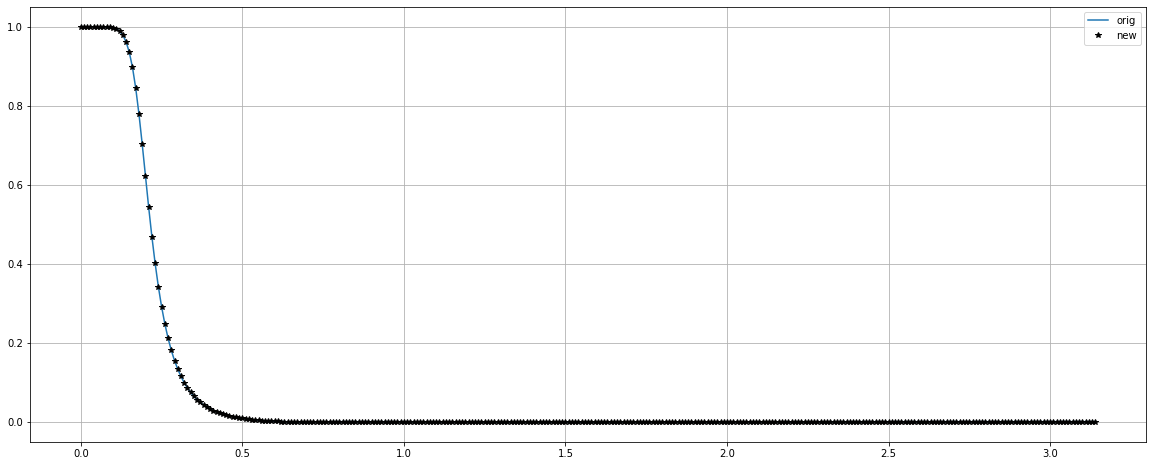

In [7]:
plt.plot(w,np.abs(h_orig),  label="orig")
plt.plot(w,np.abs(H), "k*", label="new")
# plt.plot(w,np.abs(H)*0.02, label="new 2")

plt.legend()
plt.show()

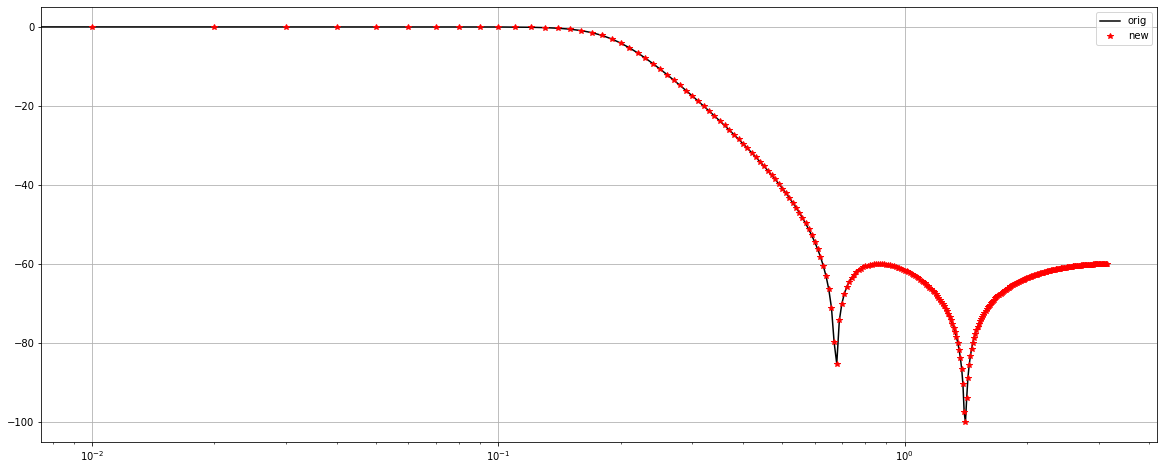

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h_orig), 1e-5)), "k-", label='orig')
ax.semilogx(w, 20 * np.log10(np.maximum(abs(H), 1e-5)),"r*", label='new')

plt.legend()
plt.show()

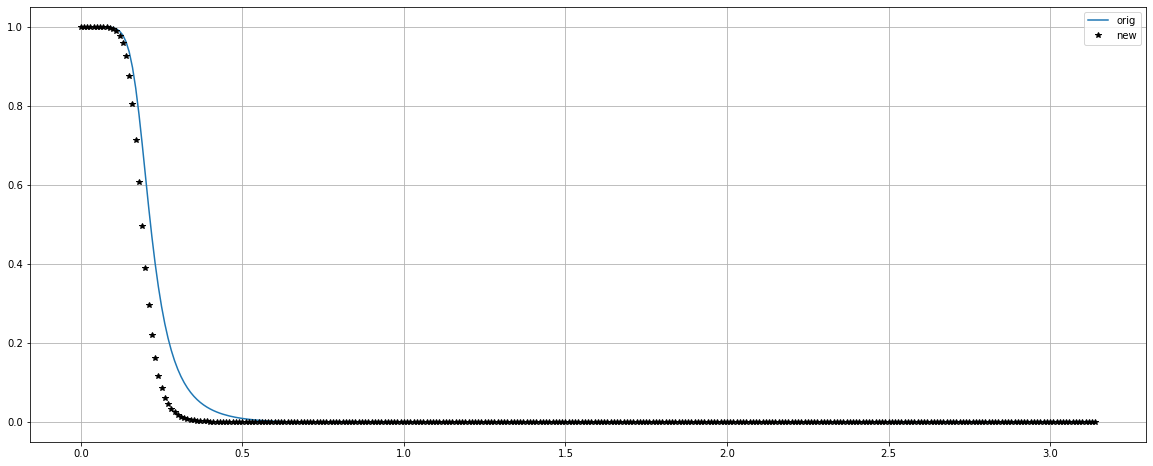

In [12]:
H_mag_squared = dsp.H_mag_squared(c, w)

plt.plot(w,np.abs(h_orig),  label="orig")
plt.plot(w,H_mag_squared, "k*", label="new")

plt.legend()
plt.show()

In [136]:

def plot_filter(c, w, fs, orig=None):
    """ Plots the magnitude spectrum, the phase response and the 
    group delay for the filter coefficients c

    coeffs: list
        list of ATypeSOS filter stages
    w : arraylike
        frequency vector
    """
   
    h = H_eval(c, w)
    fig = plt.figure(figsize=(12, 6))
    plt.clf()
    ax1 = plt.subplot(121)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain [dB]')
    plt.grid(True)

#     ax2 = plt.subplot(122)
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Phase [deg]', color='b')
#     plt.grid(True)

    nyq = fs/2

    ax1.plot(w / np.pi * nyq, 20 * np.log10(abs(h)), 'k')
#     angles = np.unwrap(np.angle(h))
#     ax2.plot(nyq * w / np.pi, 180/np.pi*angles)

#     ax3 = ax2.twinx()
#     g = groupdelay(c,w=w)
#     ax3.plot(nyq * w / np.pi, g, 'r')
#     ax3.set_ylabel('Group Delay', color='r')
#     plt.grid(True)
    

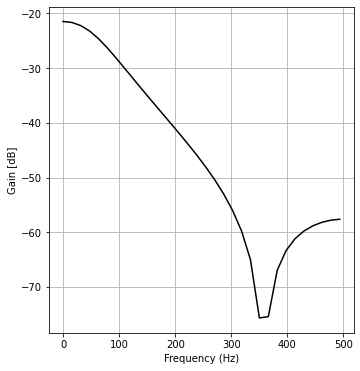

In [28]:
plot_filter(c, w, fs=1000)

In [66]:
coeffs

[AntoniouTypeSOS(a0=0.0015040232024917187, a1=-0.0004878603765871079, a2=0.0015040232024917182, b0=0.6957363993681411, b1=-1.6630019863480965, b2=1.0),
 AntoniouTypeSOS(a0=1.0000000000000004, a1=-1.5597125423334535, a2=1.0, b0=0.8694929078662119, b1=-1.8355956664948787, b2=1.0)]

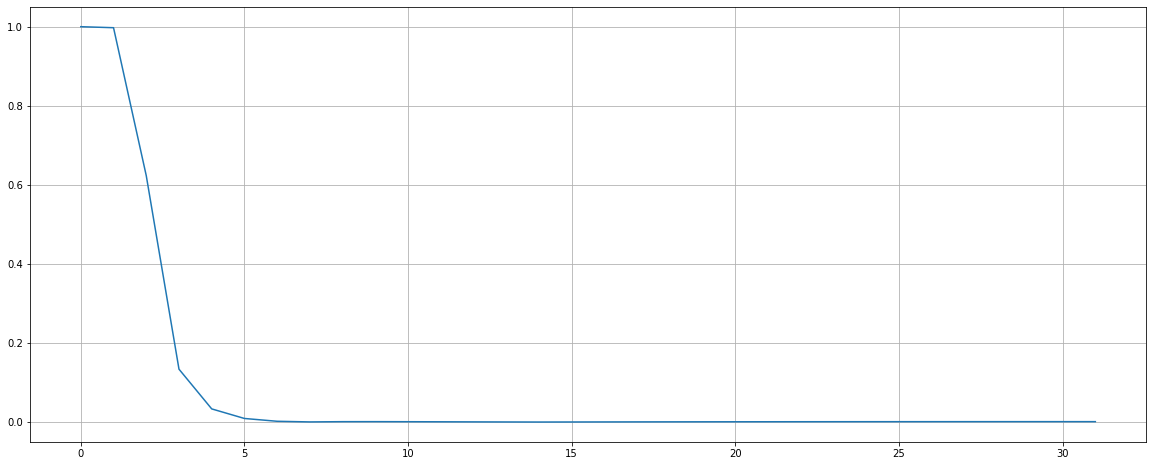

In [71]:
plt.plot(np.abs(H_eval_ref(coeffs, w)))

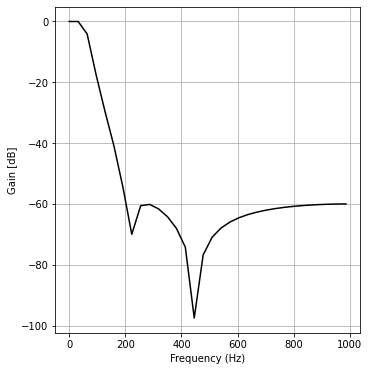

In [74]:
plot_filter(coeffs, w, 2000)